********************************Loan Default Prediction & Risk Strategy********************************

Build a machine learning model to predict if a borrower will pay back their loan or default.

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("C:\\Users\\Amit Ranjan\\Desktop\\Data Science\\Loan Default Prediction & Risk Strategy\\Loan_data.csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


Great! We don't have any null Values.

---------- Class Imbalance: Analysis ---------- 



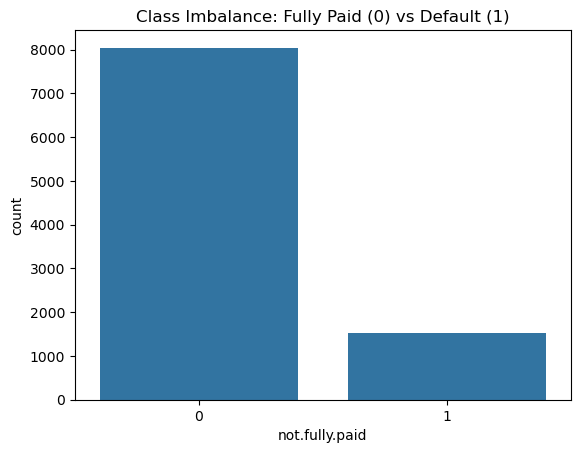

not.fully.paid
0    8045
1    1533
Name: count, dtype: int64
not.fully.paid
0    84.0
1    16.0
Name: proportion, dtype: float64


In [6]:
print("-" *10, "Class Imbalance: Analysis","-" *10, "\n")

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='not.fully.paid', data=df)
plt.title('Class Imbalance: Fully Paid (0) vs Default (1)')
plt.show()

print(df['not.fully.paid'].value_counts())
print(df['not.fully.paid'].value_counts(normalize=True).round(2)*100)

📝Insights:
1. The "Safe" zone: 84% loans are fully paid.
2. The "Risk" zone: 16% loans are defaults.
3. If we train a model on this standard data, it would likely to fall in 'Accuracy Paradox': 
    The model could simply predict "0" (Fully Paid) for everyone with 84% accuracy.
4. It could catch 0% of defaulters which is 16%, a big loss.

********** ✂ Exploratory Data Analysis (EDA) ✂ ********** 

---------- Loan Purpose vs. Default ---------- 

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64 



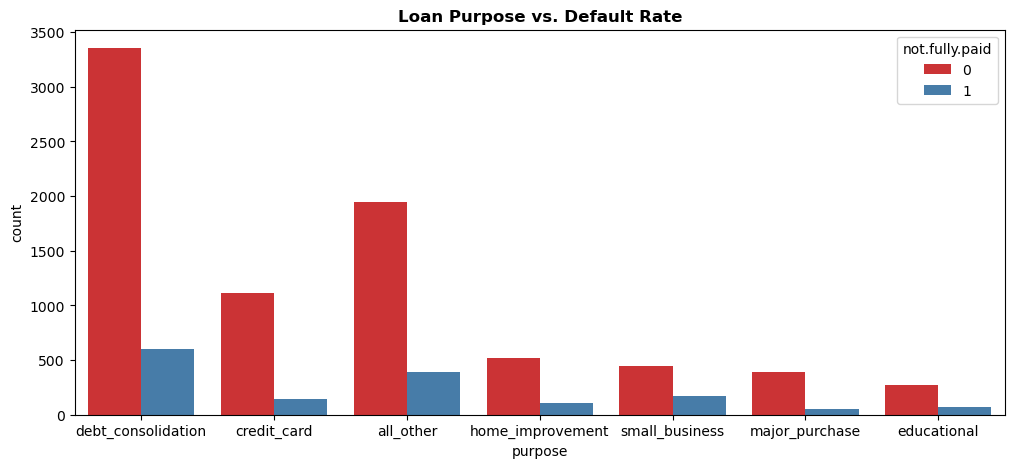



                    Fully Paid  Default  Default_Rate %  Risk_Ratio %
purpose                                                              
small_business             447      172            27.8          38.5
educational                274       69            20.1          25.2
home_improvement           522      107            17.0          20.5
all_other                 1944      387            16.6          19.9
debt_consolidation        3354      603            15.2          18.0
credit_card               1116      146            11.6          13.1
major_purchase             388       49            11.2          12.6


In [8]:
print("*" *10, "✂ Exploratory Data Analysis (EDA) ✂","*" *10, "\n")

print("-" *10, "Loan Purpose vs. Default","-" *10, "\n")



print(df['purpose'].value_counts(), "\n")

plt.figure(figsize=(12,5))
sns.countplot(x='purpose', data=df, hue='not.fully.paid', palette='Set1')
plt.title("Loan Purpose vs. Default Rate", fontweight='bold')
plt.show()

print("\n")

risk_analysis = df.groupby('purpose')['not.fully.paid'].value_counts().unstack()
risk_analysis.columns = ['Fully Paid', 'Default']
#riskiness of different categories fairly, regardless of how popular they are.
risk_analysis['Default_Rate %'] = ((risk_analysis['Default']/(risk_analysis['Fully Paid'] + risk_analysis['Default']))*100).round(1)

#For every n Good Loans we approve, we should expect m to Default
risk_analysis['Risk_Ratio %'] = ((risk_analysis['Default'] / risk_analysis['Fully Paid'])*100).round(1)

risk_analysis.sort_values('Default_Rate %', ascending=False, inplace=True)
print(risk_analysis)

📝Insights:
1. **The High Danger Zone: small_business** which has **27.8% of Default Rate** and 
    roughly, For every 2.5 Good Loans we approve,  we should expect 1 to Default.
    Recommendation: Tighter approval thresholds or higher interest rates for this specific group.
2. **The safest Zone: major_purchase** which has just 11.2 default Rate and 
    roughly, For every 8 Good Loans we approve,  we should expect 1 to Default.
    Recommendation: The bank could offer them lower rates to attract more of them.
3. **The Volumn Trap: debt_consolidation** which has highest number of default but endup having just 15.2% of Default Rate.
    Recommendation:It is a stable, high-volume product. It's not "dangerous," just popular

In [10]:
print("*" *10, "One-Hot Encoding: Column-Purpose","*" *10, "\n")


data = pd.get_dummies(df, columns=['purpose'], drop_first=True)

print("Original Shape:", df.shape)
print("New Shape:", data.shape)
print("\nNew Columns Preview:")
print(data.columns)

********** One-Hot Encoding: Column-Purpose ********** 

Original Shape: (9578, 14)
New Shape: (9578, 19)

New Columns Preview:
Index(['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
       'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement',
       'purpose_major_purchase', 'purpose_small_business'],
      dtype='object')


In [11]:
print("*" *10, "Train-Test Split","*" *10, "\n")

# Training the model: 70% training and 30% test

from sklearn.model_selection import train_test_split
# assigning data set
X = data.drop('not.fully.paid', axis=1)
y = data['not.fully.paid']

#splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

print(f"Training Data Shape: {X_train.shape}\n"
        f"Testing Data Shape: {X_test.shape}")

********** Train-Test Split ********** 

Training Data Shape: (6704, 18)
Testing Data Shape: (2874, 18)


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [13]:
model_rfc = RandomForestClassifier(n_estimators=600, random_state=101, class_weight='balanced')

model_rfc.fit(X_train, y_train)

pred_rfc = model_rfc.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, pred_rfc))
print("\nClassification Report:")
print(classification_report(y_test, pred_rfc))

Confusion Matrix:
[[2429    2]
 [ 439    4]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.67      0.01      0.02       443

    accuracy                           0.85      2874
   macro avg       0.76      0.50      0.47      2874
weighted avg       0.82      0.85      0.78      2874



📝Insights:
1. Accuracy Paradox: We have penalised model with class_weight=balanced but still it has not learnt. 
2. We will use SMOTE: 

In [15]:
from imblearn.over_sampling import SMOTE

In [16]:
#resampling with SMOTE

sm = SMOTE(random_state=101)
X_train_r, y_train_r = sm.fit_resample(X_train, y_train)
model_rfc_smote = RandomForestClassifier(n_estimators=600, random_state=101)
model_rfc_smote.fit(X_train_r, y_train_r)

pred_smote = model_rfc_smote.predict(X_test)

print("Confusion Metrix (SMOTE):")
print(confusion_matrix(y_test, pred_smote))
print("\nClassification Report (SMOTE) :\n")
print(classification_report(y_test, pred_smote))

Confusion Metrix (SMOTE):
[[2152  279]
 [ 350   93]]

Classification Report (SMOTE) :

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      2431
           1       0.25      0.21      0.23       443

    accuracy                           0.78      2874
   macro avg       0.56      0.55      0.55      2874
weighted avg       0.77      0.78      0.77      2874



In [17]:
probs_smote = model_rfc_smote.predict_proba(X_test)[:, 1]
threshold = 0.25 # we are seting model to say Default if risk is > 25%.

new_preds = (probs_smote > threshold).astype(int)

print(f"Threshold: {threshold}\n")
print("Confusion Matrix:")
print(confusion_matrix(y_test, new_preds))
print("\nClassification Report:")
print(classification_report(y_test, new_preds))

Threshold: 0.25

Confusion Matrix:
[[1127 1304]
 [ 136  307]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.46      0.61      2431
           1       0.19      0.69      0.30       443

    accuracy                           0.50      2874
   macro avg       0.54      0.58      0.45      2874
weighted avg       0.78      0.50      0.56      2874



📝Insights:
1. Original Model: Missed 439 bad guys. SMOTE Model: Missed 350 bad guys. Threshold (0.25) Model: Missed only 136 bad guys.
2. Our Recall for Class 1 skyrocketed to 0.69 (69%). Which means model(with threshold) can catch 7 out of every 10 defaulters.
3. The Explosion of False Alarms: Original Model: Rejected only 2 innocent guys. SMOTE Model: Rejected 279 innocent guys. 
    Threshold (0.25) Model: Rejected 1304 innocents guys.
4. To catch those extra bad guys, the model is now rejecting almost half of all applicants. 
    For every 5 people it rejects, only 1 was actually going to default.
5. **In a Recession: YES. Banks are terrified of losing money.**
    **We would happily reject 1,000 good people just to avoid losing $ to defaults.**
6. **In a Boom: NO. We are turning away too many paying customers (the 1304 people in the top right).**

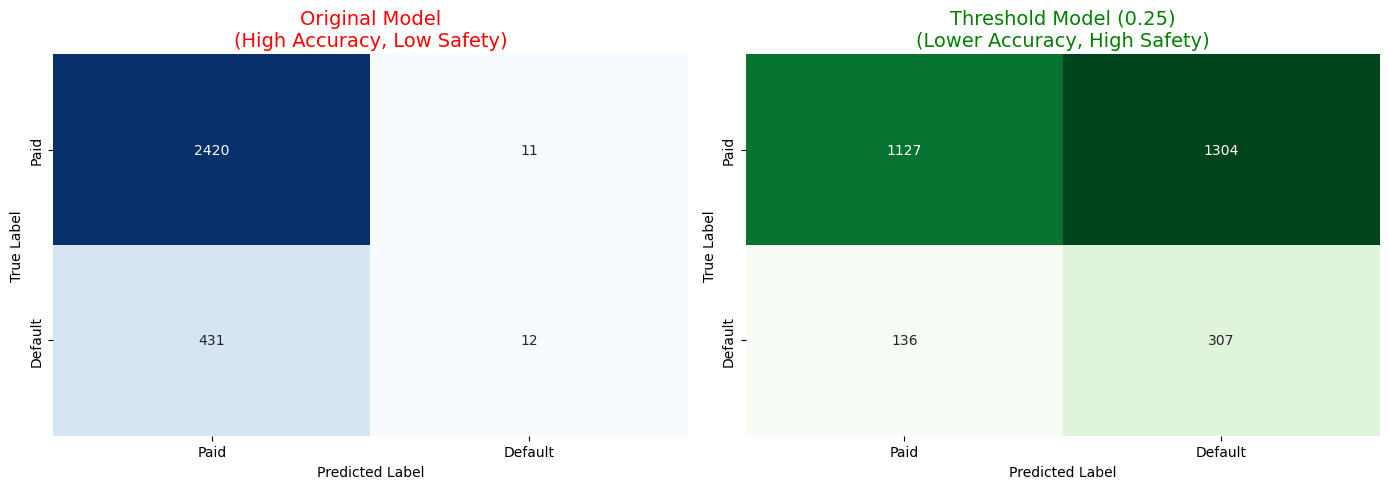

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size (One row, two columns)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# 1. Plot the Original "Lazy" Model
# (Using your original predictions 'pred_rfc' or defining manually if variables are lost)
# Manual input based on your image: [[2420, 11], [431, 12]]
cm_original = [[2420, 11], [431, 12]] 

sns.heatmap(cm_original, annot=True, fmt='d', cmap='Blues', ax=ax[0], cbar=False)
ax[0].set_title('Original Model\n(High Accuracy, Low Safety)', fontsize=14, color='red')
ax[0].set_xlabel('Predicted Label')
ax[0].set_ylabel('True Label')
ax[0].set_xticklabels(['Paid', 'Default'])
ax[0].set_yticklabels(['Paid', 'Default'])

# 2. Plot the New "Strict" Model (Threshold 0.25)
# Manual input based on your image: [[1127, 1304], [136, 307]]
cm_strict = [[1127, 1304], [136, 307]]

sns.heatmap(cm_strict, annot=True, fmt='d', cmap='Greens', ax=ax[1], cbar=False)
ax[1].set_title('Threshold Model (0.25)\n(Lower Accuracy, High Safety)', fontsize=14, color='green')
ax[1].set_xlabel('Predicted Label')
ax[1].set_ylabel('True Label')
ax[1].set_xticklabels(['Paid', 'Default'])
ax[1].set_yticklabels(['Paid', 'Default'])

plt.tight_layout()
plt.show()

📝Insights:
1. The Left Chart (Red Title): "Initially, the model achieved 85% accuracy, but it was dangerously passive. 
    It only caught 12 defaulters (bottom-right), representing a massive financial risk to the bank."
2. The Right Chart (Green Title): "By applying SMOTE and adjusting the Decision Threshold to 0.25, 
    I optimized the model for risk management. It now catches 307 defaulters—an improvement of over 2,400% in recall.
3. This demonstrates that I can tune machine learning models not just for 'accuracy scores,' but for real-world business value and risk mitigation

In [21]:
df.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [22]:
#We will simulate a Real-World Application where a new customer walks into the bank for a loan. To check the Model.
print("-" *10, "Custumer Type- 1", "-" *10)
new_guy  = pd.DataFrame({'credit.policy': [1],
                         'purpose': ['small_business'],
                         'int.rate': [0.15], # 15% interest
                         'installment': [500],
                         'log.annual.inc': [11],
                         'dti': [20],
                         'fico': [650],
                         'days.with.cr.line': [3000], 
                         'revol.bal': [5000], 
                         'revol.util': [75],
                         'inq.last.6mths': [5], 
                         'delinq.2yrs':[0], 
                         'pub.rec': [0]
                        })

new_guy_encoded= pd.get_dummies(new_guy, columns=['purpose'], drop_first=True)
new_guy_ready = new_guy_encoded.reindex(columns=X_train.columns, fill_value=0)
probability = model_rfc_smote.predict_proba(new_guy_ready)[0, 1]

print(f"Probability of Default: {probability:.2%}")

if probability > 0.25:
    print("Decision: 🚨 REJECT LOAN (Too Risky)")
else:
    print("Decision: ✅ APPROVE LOAN")


print("\n", "-" *10, "Custumer Type- 2", "-" *10)


sec_guy  = pd.DataFrame({'credit.policy': [1],
                         'purpose': ['small_business'],
                         'int.rate': [0.20], # 15% interest
                         'installment': [900],
                         'log.annual.inc': [9],
                         'dti': [35],
                         'fico': [650],
                         'days.with.cr.line': [500], 
                         'revol.bal': [10000], 
                         'revol.util': [75],
                         'inq.last.6mths': [10], 
                         'delinq.2yrs':[2], 
                         'pub.rec': [1]
                        })

sec_guy_encoded= pd.get_dummies(sec_guy, columns=['purpose'], drop_first=True)
sec_guy_ready = sec_guy_encoded.reindex(columns=X_train.columns, fill_value=0)
probability = model_rfc_smote.predict_proba(sec_guy_ready)[0, 1]

print(f"Probability of Default: {probability:.2%}")

if probability > 0.25:
    print("Decision: 🚨 REJECT LOAN (Too Risky)")
else:
    print("Decision: ✅ APPROVE LOAN")

---------- Custumer Type- 1 ----------
Probability of Default: 22.17%
Decision: ✅ APPROVE LOAN

 ---------- Custumer Type- 2 ----------
Probability of Default: 50.00%
Decision: 🚨 REJECT LOAN (Too Risky)


# 🏦 Loan Default Prediction using Random Forest & SMOTE

## 📌 Project Overview
The goal of this project was to predict whether a borrower will pay back their loan in full. 
Using LendingClub data, I built a Random Forest model to identify high-risk borrowers and reduce financial loss.

## 🔧 Key Techniques Used
* **Data Visualization:** Seaborn & Matplotlib (Heatmaps, Countplots).
* **Feature Engineering:** Dummy variables for categorical data.
* **Handling Imbalance:** Applied **SMOTE** (Synthetic Minority Over-sampling Technique) to fix the 8:1 class imbalance.
* **Model Tuning:** Adjusted the **Decision Threshold to 0.25** to prioritize "Recall" (catching defaulters) over "Precision."

## 📈 Results
* **Baseline Model:** Missed 99% of defaulters (Recall: 0.01).
* **Final Optimized Model:** Caught 69% of defaulters (Recall: 0.69).
* **Business Impact:** The final model is tuned for risk aversion, preventing potential losses from high-risk loans.

In [24]:
import pickle

# 1. Using pickle we will save for model_smote (threshold)
filename = 'final_loan_model.pkl'

# 2. Save it to a file (wb = Write Binary)
pickle.dump(model_rfc_smote, open(filename, 'wb'))

print(f"Success! Model saved as {filename}")

Success! Model saved as final_loan_model.pkl
